# Learn GeoPandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [4]:
world.shape

(177, 6)

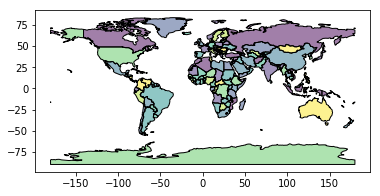

In [5]:
world.plot()

In [6]:
world.geometry.name


'geometry'

In [7]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

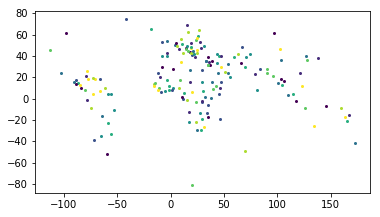

In [8]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

In [9]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

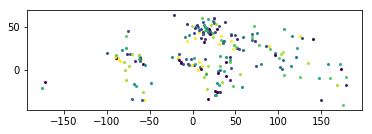

In [10]:
cities.plot()

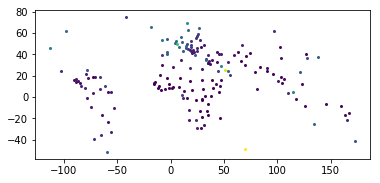

In [11]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

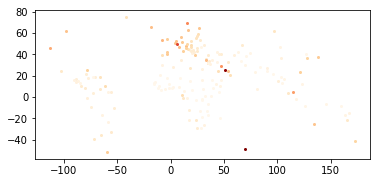

In [12]:
world.plot(column='gdp_per_cap', cmap='OrRd')

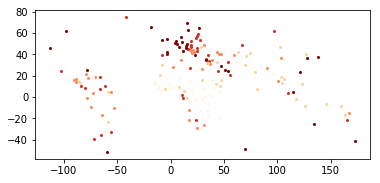

In [13]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

### Maps with Layers

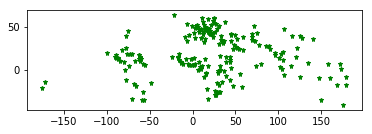

In [14]:
cities.plot(marker="*", color='green', markersize=5)

In [15]:
cities = cities.to_crs(world.crs)

#### Method 1

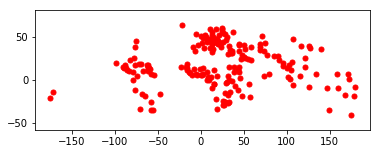

In [16]:
base = world.plot(color='white')
cities.plot(ax=base, marker='o', color='red', markersize=5)

#### Method 2

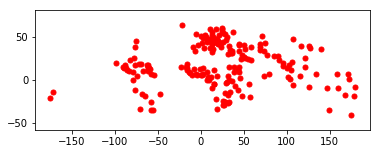

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

world.plot(ax=ax, color='white')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

### Re-Projecting

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [19]:
world.crs

{'init': 'epsg:4326'}

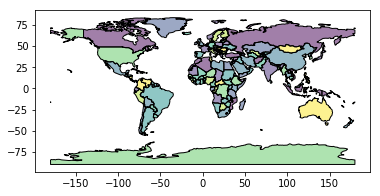

In [20]:
world.plot()

In [21]:
world = world[(world.name != 'Antarctica') & (world.name != 'Fr. S. Antarctic Lands')]

In [22]:
world = world.to_crs({'init': 'epsg:3395'})

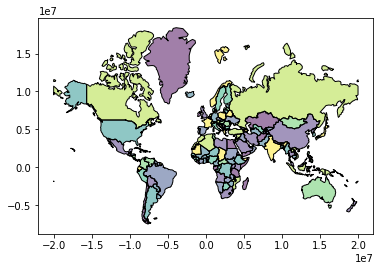

In [23]:
world.plot()

### Geometric Manipulations

In [24]:
from shapely.geometry import Polygon

In [25]:
p1 = Polygon([(0,0), (1,0), (1, 1)])
p2 = Polygon([(0,0), (1,0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])

In [26]:
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

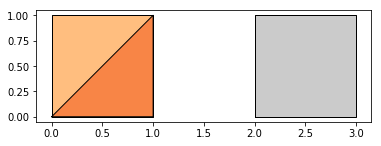

In [27]:
g.plot()

In [28]:
print(g.area)

0    0.5
1    1.0
2    1.0
dtype: float64


In [29]:
g.buffer(0.5)

0    POLYGON ((-0.3535533905932737 0.35355339059327...
1    POLYGON ((-0.5 0, -0.5 1, -0.4975923633360985 ...
2    POLYGON ((1.5 0, 1.5 1, 1.502407636663901 1.04...
dtype: object

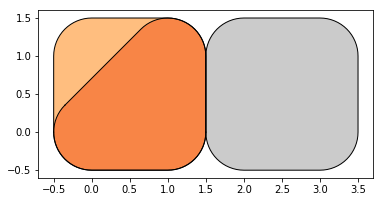

In [30]:
g.buffer(0.5).plot()

### The different Overlay Operations

In [31]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                        Polygon([(2, 2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3, 3), (1, 3)]),
                       Polygon([(3, 3), (5,3), (5,5), (3, 5)])])

df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1, 2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1, 2]})

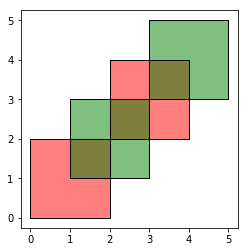

In [32]:
ax = df1.plot(color = 'red')
df2.plot(ax=ax, color='green')

In [36]:
res_union = gpd.overlay(df1, df2, how='union')

In [37]:
res_union

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1.0,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
3,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
4,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
5,2.0,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
6,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
7,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"
8,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


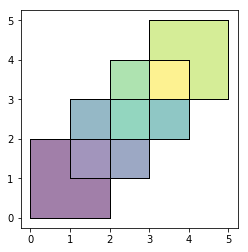

In [47]:
ax = res_union.plot()
df1.plot(ax=ax, facecolor='none');
df2.plot(ax=ax, facecolor='none');

In [48]:
res_intersection=gpd.overlay(df1, df2, how='intersection')

In [49]:
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
1,2,1,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
2,2,2,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


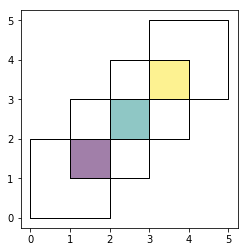

In [51]:
ax = res_intersection.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

In [52]:
res_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')

In [53]:
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
2,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
3,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
4,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
5,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"


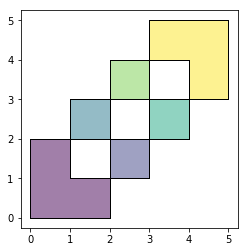

In [55]:
ax = res_symdiff.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

In [56]:
res_difference = gpd.overlay(df1, df2, how='difference')

In [57]:
res_difference

,df1,df2,geometry
0,1,None,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,2,None,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
2,2,None,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"


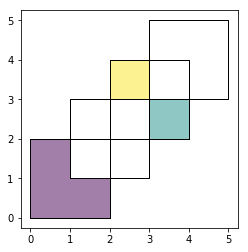

In [58]:
ax = res_difference.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

In [59]:
res_identity = gpd.overlay(df1, df2, how='identity')

In [60]:
res_identity

,df1,df2,geometry
0,1,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,2,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
3,2,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
4,2,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
5,2,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


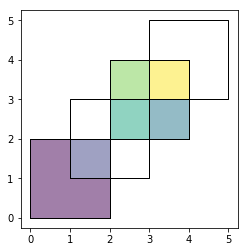

In [62]:
ax = res_identity.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

### Overlay Countries Example

In [63]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [64]:
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [65]:
countries = world[world['continent'] == "South America"]

In [67]:
countries = countries[['geometry', 'name']]

In [68]:
countries = countries.to_crs('+init=epsg:3395')

In [70]:
capitals = capitals.to_crs('+init=epsg:3395')

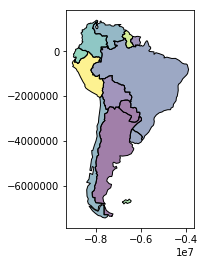

In [71]:
countries.plot()

In [72]:
capitals.crs

'+init=epsg:3395'

In [73]:
capitals['geometry'] = capitals.buffer(500000)

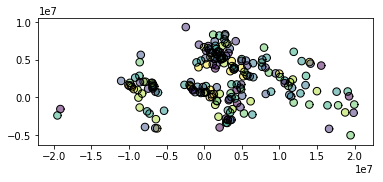

In [74]:
capitals.plot()

### Aggregation with dissolve

In [80]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [81]:
world = world[['continent', 'geometry']]

In [82]:
continents = world.dissolve(by='continent')

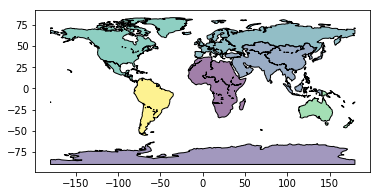

In [83]:
continents.plot()

In [86]:
continents.head()

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."


#### Aggregate by Population

In [89]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [90]:
world = world[['continent','geometry','pop_est']]

In [91]:
continents = world.dissolve(by='continent', aggfunc='sum')

/home/fjcamillo/anaconda2/envs/datascience/lib/python3.5/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "quantities". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


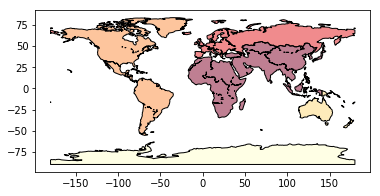

In [92]:
continents.plot(column='pop_est', scheme='quantities', cmap='YlOrRd')

In [93]:
continents.head()

,geometry,pop_est
continent,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,9.932819e+08
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...,3.802000e+03
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...,4.085853e+09
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...,7.281312e+08
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",5.393510e+08


### Mergin Data

In [94]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [96]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

##### Attribute Join

In [103]:
country_shapes = world[['geometry', 'iso_a3']]

In [104]:
country_names = world[['name', 'iso_a3']]

##### Spatial Join

In [99]:
countries = world[['geometry', 'name']]

In [100]:
countries = countries.rename(columns={'name':'countries'})

In [101]:
country_shapes.head()

,geometry,iso_a3
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG


In [102]:
country_names.head()

,name,iso_a3
0,Afghanistan,AFG
1,Angola,AGO
2,Albania,ALB
3,United Arab Emirates,ARE
4,Argentina,ARG


In [105]:
country_shapes = country_shapes.merge(country_names, on='iso_a3')

In [106]:
country_shapes.head()

,geometry,iso_a3,name
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina


In [107]:
countries.head()

,geometry,countries
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina


In [108]:
cities.head()

,geometry,name
0,POINT (12.45338654497177 41.90328217996012),Vatican City
1,POINT (12.44177015780014 43.936095834768),San Marino
2,POINT (9.516669472907267 47.13372377429357),Vaduz
3,POINT (6.130002806227083 49.61166037912108),Luxembourg
4,POINT (158.1499743237623 6.916643696007725),Palikir


In [110]:
cities_with_country = gpd.sjoin(cities, countries, how='inner', op='intersects')

In [111]:
cities_with_country.head()

,geometry,name,index_right,countries
0,POINT (12.45338654497177 41.90328217996012),Vatican City,79,Italy
1,POINT (12.44177015780014 43.936095834768),San Marino,79,Italy
192,POINT (12.481312562874 41.89790148509894),Rome,79,Italy
2,POINT (9.516669472907267 47.13372377429357),Vaduz,9,Austria
184,POINT (16.36469309674374 48.20196113681686),Vienna,9,Austria


### Get the Philippines

In [76]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [77]:
ph = world[world['name']=="Philippines"]

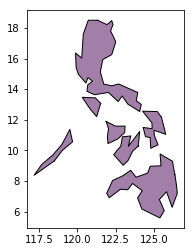

In [79]:
ph.plot()

In [ ]:
philgadm = gdp.GeoDataFrame